## Name: Agrawal Nidhi
## Student id: 21-717-673

<br>

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy import matrix_generator
from NEMtropy.network_functions import build_adjacency_from_edgelist

import os
import warnings
warnings.filterwarnings('ignore')

## A06.1 - Exponential Random Graph Models

### For the World Trade Web dataset, fit different ERGM-based Configuration Models and compare basic network metrics with null models<br>


solution error = 6.9634324972867034e-09

solution error = 2.685311528694001e-09

solution error = 5.6986948493431555e-09

solution error = 2.818520528080626e-09

solution error = 2.615450966914068e-09

solution error = 3.489049049676396e-09

solution error = 2.3705126750428462e-09

solution error = 2.7137119218423322e-09

solution error = 4.676905973610701e-09

solution error = 2.761066042467064e-09

solution error = 1.3358487649384188e-09

solution error = 2.003417876039748e-09

solution error = 1.3613430382974911e-09

solution error = 2.641201035658014e-09

solution error = 8.650999916426372e-10

solution error = 2.0152697288722266e-09

solution error = 1.7631549553698278e-09

solution error = 3.6293883454163733e-09

solution error = 6.101572580519132e-09

solution error = 2.546265420733107e-09

solution error = 2.3271979898709105e-09

solution error = 2.304130219954459e-09


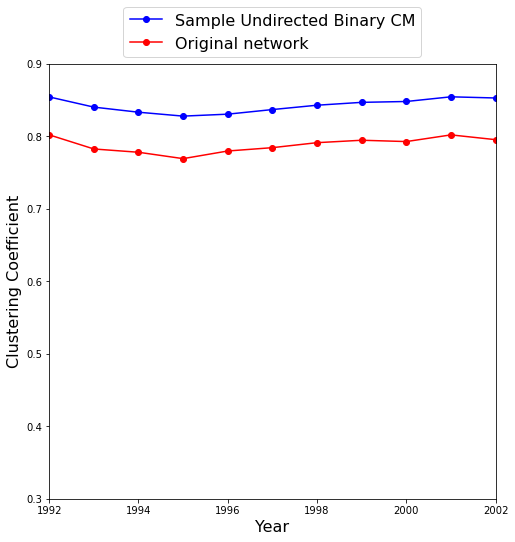

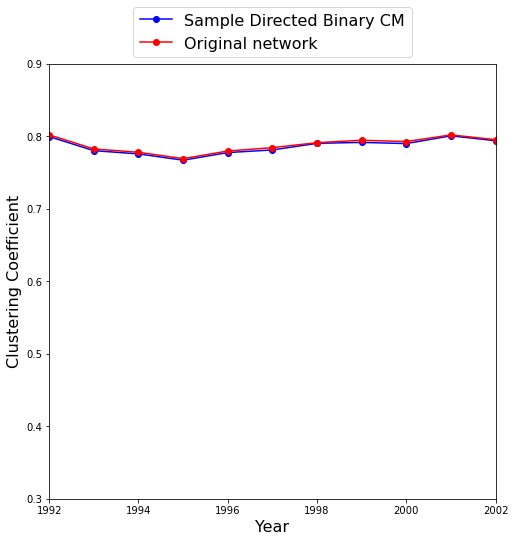

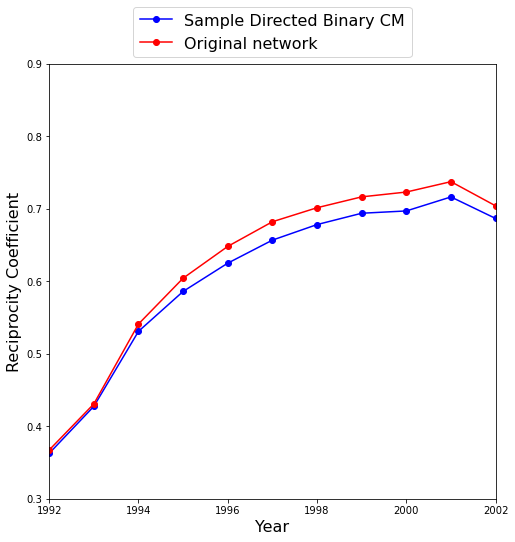

In [2]:

filelist = os.listdir("Data")   # List of all file names containing datasets in directory Data

clust_coeff_undir = []
clust_coeff_dir = []
reciprocity = []
clust_orig_List = []
reciprocity_orig_List = []

# Loop to read all files in filelist and explore their properties
for file in sorted(filelist):        
    
    # Read dataset
    graph = nx.read_graphml(os.path.join("Data/", file))
    
    clust_orig_List.append(nx.average_clustering(graph)) # list of original average clustering coefficient of the given graphs
    reciprocity_orig_List.append(nx.reciprocity(graph))  # list of original reciprocity coefficient of the given graphs
    
    adj_dir = nx.to_numpy_array(graph)                   # Converting graph to numpy adjacency matrix
    adj_undir = nx.to_numpy_array(graph.to_undirected()) # Converting graph to numpy symmetric adjacency matrix
    
    graph_undir = UndirectedGraph(adj_undir) # initialize a NEMtropy UndirectedGraph object
    graph_dir = DirectedGraph(adj_dir)       # initialize a NEMtropy DirectedGraph object
    
    # Solve the maximum likelihood problem for the model of our choice
    graph_undir.solve_tool(model="cm_exp") # undirected configuration model
    
    graph_dir.solve_tool(model="dcm_exp")  # directed configuration model

    # graph_undir and graph_dir contain the maximum likelihood solution
    graph_undir.ensemble_sampler(10, cpu_n=1, output_dir="sample/undirected/") # sample 10 networks from the ERGM
    graph_dir.ensemble_sampler(10, cpu_n=1, output_dir="sample/directed/") # sample 10 networks from the ERGM

    # networks are saved in the form of edgelists in the 'sample/..' subfolder

    clust_undir = []
    clust_dir = []
    reciprocityList = []
    
    
    # for undirected sample networks
    for i in range(10):
        sample_edgelist = np.loadtxt(f"sample/undirected/{i}.txt") # load sample network
        g_undir = nx.Graph()
        
        # add edges to graph 'g' as per the list of edges in sample_edgelist
        g_undir.add_edges_from(sample_edgelist)
        clust_undir.append(nx.average_clustering(g_undir)) # list of clustering coefficients of all sample networks
        
        
    # for directed sample networks
    for i in range(10):
        sample_edgelist = np.loadtxt(f"sample/directed/{i}.txt") # load sample network
        g_dir = nx.DiGraph()
        
        #g_dir.add_edges_from(sample_edgelist.astype(int)) # add edges to graph 'g' as per the list of edges in sample_edgelist
        g_dir.add_edges_from(sample_edgelist) # add edges to graph 'g' as per the list of edges in sample_edgelist
        
        clust_dir.append(nx.average_clustering(g_dir)) # list of clustering coefficients of all sample networks
        reciprocityList.append(nx.reciprocity(g_dir))  # reciprocity coefficient of the given graph
        
    # Calculate average coefficient values for all samples of each dataset
    clust_undir_mean = np.mean(np.array(clust_undir))
    clust_dir_mean = np.mean(np.array(clust_dir))
    reciprocity_mean = np.mean(np.array(reciprocityList))

    clust_coeff_undir.append(clust_undir_mean) # list of mean clustering coefficients of all undirected graphs
    clust_coeff_dir.append(clust_dir_mean)     # list of mean clustering coefficients of all directed graphs
    reciprocity.append(reciprocity_mean)       # list of mean reciprocity coefficients of all directed graphs

# lists for generating plots
coeff_orig_list = [clust_orig_List, clust_orig_List, reciprocity_orig_List]
coeff_list = [clust_coeff_undir, clust_coeff_dir, reciprocity]
label_list = ['Sample Undirected Binary CM', 'Sample Directed Binary CM', 'Sample Directed Binary CM']
yLabel_list = ['Clustering Coefficient', 'Clustering Coefficient', 'Reciprocity Coefficient']

years = range(1992, 2003)

# plot graphs
for i in range(len(coeff_orig_list)):
    plt.figure(figsize = (8,8))
    plt.plot(years, coeff_list[i], '-ok', label = label_list[i], color = 'blue')
    plt.plot(years, coeff_orig_list[i], '-ok', label = 'Original network', color = 'red')
    plt.xlim(years[0], years[-1])
    plt.ylim(0.3,0.9)
    plt.xlabel('Year', fontsize = 16)
    plt.ylabel(yLabel_list[i], fontsize = 16)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fontsize = 16)
    plt.show()
    print('\n\n')


## A06.2 - Weighted ERGMs

### For the World Trade Web dataset, fit different weighted ERGM-based Configuration Models and compare strength assortativity coefficient with null models<br>


solution error = 36795.23558242619
graph_undir.relative_error_strength:  0.0004425878051226283

solution error = 319627.7516784668
graph_dir.relative_error_strength:  1.4203435557898569e-06

solution error = 24.382586700841784
graph_undir.relative_error_strength:  3.219519918670586e-06

solution error = 107578.72784423828
graph_dir.relative_error_strength:  2.807911539021631e-05

solution error = 0.49741807393729687
graph_undir.relative_error_strength:  4.940992095467712e-08

solution error = 552448.8244628906
graph_dir.relative_error_strength:  0.0010046265281423406

solution error = 0.9667106783017516
graph_undir.relative_error_strength:  1.4176888397308543e-07

solution error = 113847.75817871094
graph_dir.relative_error_strength:  2.3363000690716642e-05

solution error = 0.00048454850912094116
graph_undir.relative_error_strength:  5.49930705590835e-11

solution error = 99649.76971435547
graph_dir.relative_error_strength:  1.7086693158943728e-05

solution error = 213.8889555335045


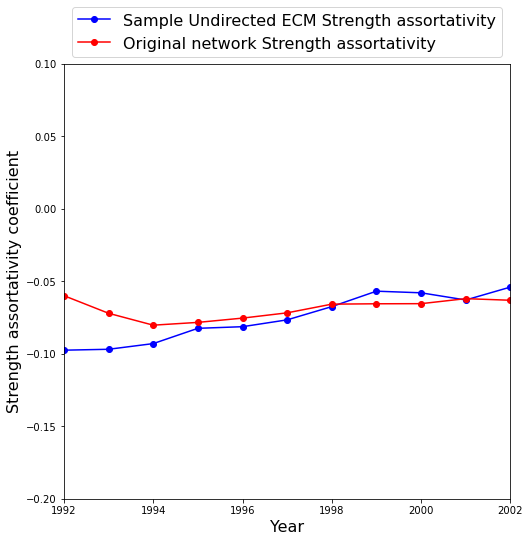

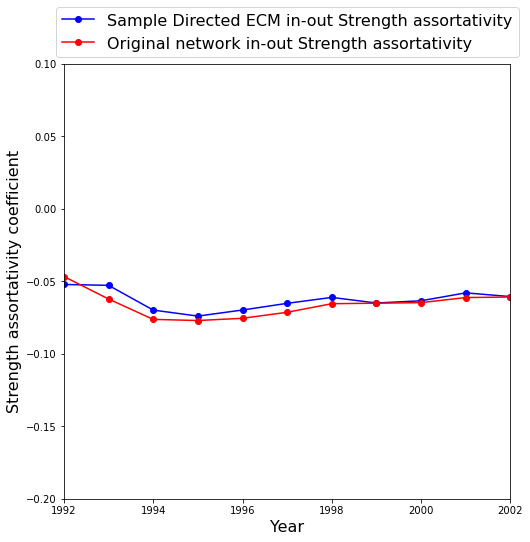

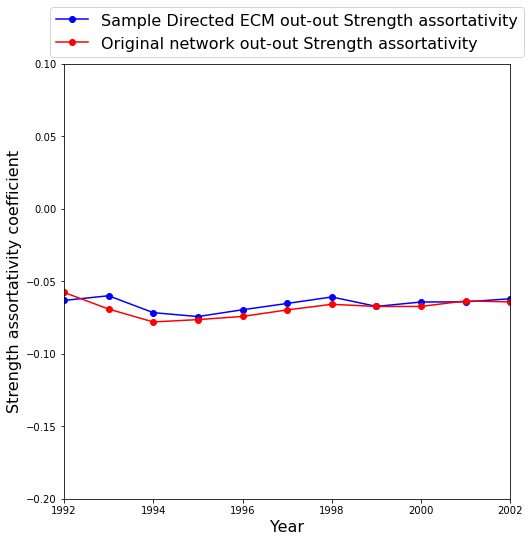

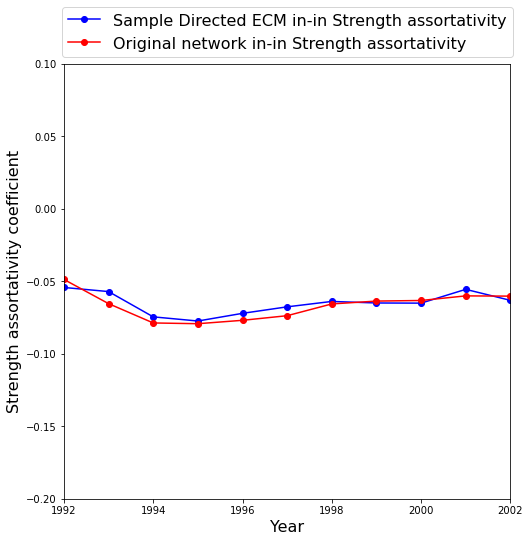

In [4]:

strAssort_orig = []
strAssort_orig_inOut = []
strAssort_orig_outOut = []
strAssort_orig_inIn = []
strAssort_undirList = []
strAssort_dirList = []
strAssort_inOut_list = []
strAssort_outOut_list = []
strAssort_inIn_list = []
strength_assort_undirList = []

# Loop to read all files in filelist and explore their properties
for file in sorted(filelist):        
    
    # Read dataset
    graph = nx.read_graphml(os.path.join("Data/", file))
    
    # add original network's strength assortativity coeff of all datasets to a list
    strAssort_orig.append(nx.degree_pearson_correlation_coefficient(graph,weight='weight'))
    strAssort_orig_inOut.append(nx.degree_pearson_correlation_coefficient(graph, x='in', y='out', weight='weight')) 
    strAssort_orig_outOut.append(nx.degree_pearson_correlation_coefficient(graph, x='out', y='out', weight='weight'))
    strAssort_orig_inIn.append(nx.degree_pearson_correlation_coefficient(graph, x='in', y='in', weight='weight'))

    
    # Converting graph to numpy adjacency matrix - for directed network samples
    adj_weigh_dir = nx.to_numpy_array(graph)
    
    # Converting graph to numpy symmetric adjacency matrix - for undirected network samples
    adj_weigh_undir = nx.to_numpy_array(graph.to_undirected())
    
    # Intialise graph instance
    graph_undir = UndirectedGraph(adj_weigh_undir)
    graph_dir = DirectedGraph(adj_weigh_dir)

    # use model "crema", which is a slightly more optimal version of the UECM and DECM models
    graph_undir.solve_tool(model="crema",
                 method="newton",
                 initial_guess="random",
                 adjacency="cm_exp",
                 method_adjacency="newton", max_steps = 1750)
    print('graph_undir.relative_error_strength: ', graph_undir.relative_error_strength)

    graph_dir.solve_tool(model="crema",
                 method="newton",
                 initial_guess="random",
                 adjacency="dcm_exp",
                 method_adjacency="newton", max_steps = 1750)
    print('graph_dir.relative_error_strength: ', graph_dir.relative_error_strength)
    
    
    # sample some weighted undirected random networks
    graph_undir.ensemble_sampler(10, cpu_n=1, output_dir='sample/undirected/')
    
    # sample some weighted directed random networks
    graph_dir.ensemble_sampler(10, cpu_n=1, output_dir='sample/directed/')

    # initialize lists to calculate average strength assortativity coeff of samples
    strAssort_UndirList = []
    strAssort_dirList = []
    strAssort_inOut = []
    strAssort_outOut = []
    strAssort_inIn = []
    
    
    # for undirected sample networks
    for i in range(10):
        
        # read the edge list
        edgelist_ens = np.loadtxt(f"sample/undirected/{i}.txt") # load sample network

        # to read the adjacency list we now use a method that maps it to a weighted adjacency matrix
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                            is_directed = False,
                                            is_sparse = False,
                                            is_weighted = True)
        
        
        # generate a networkx graph from it
        Ugraph = nx.from_numpy_array(ens_adj)
        
        
        # add strength assortativity coeff of all undirected sample networks
        strAssort_UndirList.append(nx.degree_pearson_correlation_coefficient(Ugraph,weight='weight'))
        
        
    # for directed sample networks 
    for i in range(10):
        
        # read the edge list
        edgelist_ens = np.loadtxt(f"sample/directed/{i}.txt") # load sample network
        
        # build the adjacency matrix
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                                is_directed = True,
                                                is_sparse = False,
                                                is_weighted = True)
        # generate a networkx graph from it
        Dgraph = nx.from_numpy_array(ens_adj, create_using=nx.DiGraph)
        
        # add strength assortativity coeff of all directed sample networks       
        strAssort_inOut.append(nx.degree_pearson_correlation_coefficient(Dgraph, x='in', y='out', weight='weight')) 
        strAssort_outOut.append(nx.degree_pearson_correlation_coefficient(Dgraph, x='out', y='out', weight='weight'))
        strAssort_inIn.append(nx.degree_pearson_correlation_coefficient(Dgraph, x='in', y='in', weight='weight'))
        
    # list of average strength assortativity coeff of all samples for each dataset
    strength_assort_undirList.append(np.mean(strAssort_UndirList))
    strAssort_inOut_list.append(np.mean(strAssort_inOut))
    strAssort_outOut_list.append(np.mean(strAssort_outOut))
    strAssort_inIn_list.append(np.mean(strAssort_inIn))
    

# lists for generating plots
assort_list = [strength_assort_undirList, strAssort_inOut_list, strAssort_outOut_list, strAssort_inIn_list]
assort_list_orig = [strAssort_orig, strAssort_orig_inOut, strAssort_orig_outOut, strAssort_orig_inIn]
plot1_label_list = ['Sample Undirected ECM', 'Sample Directed ECM in-out', 
              'Sample Directed ECM out-out', 'Sample Directed ECM in-in']
plot2_label_list = ['Original network', 'Original network in-out', 
              'Original network out-out', 'Original network in-in']
years = range(1992, 2003)

# plot graphs
for i in range(len(assort_list)):
    plt.figure(figsize = (8,8))
    plt.plot(years, assort_list[i], '-ok', label = plot1_label_list[i] + ' Strength assortativity', color = 'blue')
    plt.plot(years, assort_list_orig[i], '-ok', label = plot2_label_list[i] + ' Strength assortativity', color = 'red')
    plt.xlim(years[0], years[-1])
    plt.ylim(-0.2,0.1)
    plt.xlabel('Year', fontsize = 16)
    plt.ylabel('Strength assortativity coefficient', fontsize = 16)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fontsize = 16)
    plt.show()
    print('\n\n')



## A06.3 - Drawing conclusions


### Interpretation of the clustering coefficients:

- Overall <b>clustering coefficient</b> is high for the original WTW network which implies that the network is well connected. There is a tendency for countries to form trade relationships with other countries who also trade among themselves.

- From a <b>UBCM</b> network perspective, we infer that the clustering coefficient is slightly higher than the original network. Since directions are not considered, therefore the UBCM network seems  to be more clustered. However, from <b>DBCM</b> network perspective, we observe that the clustering coefficients are very similar to that of the original network. Therefore, DBCM gives more accurate perspective of the original network.



### Interpretation of the reciprocity coefficients:

- The <b>reciprocity coeffient</b> of the original WTW network increases with time. From <b>DBCM</b> network perspective, we deduce that the trend of reciprocity coefficients is very similar to that of the original network but have slightly lower values. It can be therefore inferred that the trading between countries became more bidirectional over time and there has been increasing number of countries participating in world trade. For instance, more and more countries export to other countries that in turn export to them. 


### Interpretation of strength assortativity coefficients:

- We observe that the <b>strength assortativity coefficient</b> of the original WTW network is negative. This implies that countries with lower trading values (nodes with lower weights) tend to form trade relationships with countries with higher trading values (nodes with higher weights).

- The WTW, when viewed as a <b>weighted UECM</b>, is characterized by lower strength assortativity upto year 1998 after which it increases. It implies that relatively weak trade flows coexist with strong trade flows.

- From <b>weighted DECM</b> network perspective (for all three cases in-in, in-out and out-out), dissortativity remains evident, although it is slightly less dissortative than the original network upto year 1999, after which it is quite similar to the original network.


#### To conclude, the network is highly clustered and dissortative. Therefore, it seems that the network is like a core-periphery network. Countries with lower trading values are connected to the countries which are important trading hubs and have higher trading values.


## Thank you!